In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## some useful constants
## let's work in units of r_e and m_e, i.e. the radius and mass of the earth 
m_base = 1  ## [kg],  unit of mass is 1000 kg
m_e = 5.972*10**24 / m_base
m_s = 10**3 / m_base ## mass of satellite
M = m_e + m_s
mu = m_e*m_s/M
r_base = 1 ## [m]
r_e = 6356*1000 / r_base ## radius of earth
r_s = 1.2*r_e ## radius of satellite orbit as multiple factor of earth radius
t_base = 1 ## work in units of 100 s
G = 6.67*10**-11 * m_base / r_base**3 / t_base**2 ## [m^3 s^2 / kg]

## initial conditions
## r[0] = r_s
## drdt[0] = 0
## theta[0] = 0
## dtheta_dt[0] = G * m_e / r[0]**3
dtheta_dt0 = -np.sqrt((G * m_e) / r_s**3)
init_cond = [r_s,0,0,dtheta_dt0]
text = ['r(0) = {}','v(0) = {}','theta(0) = {}','omega(0) = {}']
for t,i in list(zip(text,init_cond)):
    print(t.format(i))

r(0) = 7627200.0
v(0) = 0
theta(0) = 0
omega(0) = -0.0009474910462830717


In [2]:
## define some usual functions

def angmom(r,dtheta_dt):
    return (mu*dtheta_dt*r**2) ## angular momentum = constant
    
l = angmom(r_s,dtheta_dt0)

def U(r):
    return -G*M*mu/r

def F(r):
    return -G*M*mu/r/r

def Ueff(r):
    return l*l/2/mu/r/r

def Feff(r):
    return l*l/mu/r/r/r

def r(t,r):
    return r[1],(2/mu)*(Feff(r[0])+F(r[0])),r[3],-2*angmom(r[0],r[3])*r[1]/mu/r[0]**3

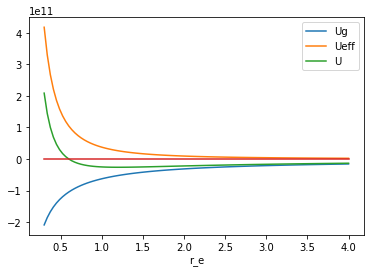

In [4]:
##### plot the potentials
rvals = np.linspace(0.3*r_e,4*r_e,100) 
fig,ax = plt.subplots()
ax.plot(rvals/r_e,U(rvals),label='Ug')
ax.plot(rvals/r_e,Ueff(rvals),label='Ueff')
ax.plot(rvals/r_e,U(rvals)+Ueff(rvals),label='U')
ax.plot(rvals/r_e,np.ones(len(rvals)))
plt.legend()
t = ax.set_xlabel('r_e')

In [5]:
time_interval=(0,5*10**4)
tvals = np.linspace(0.,float(time_interval[-1]),int(time_interval[-1]+1))
sol = solve_ivp(r,time_interval,init_cond,t_eval=tvals)
print(sol.status)

0


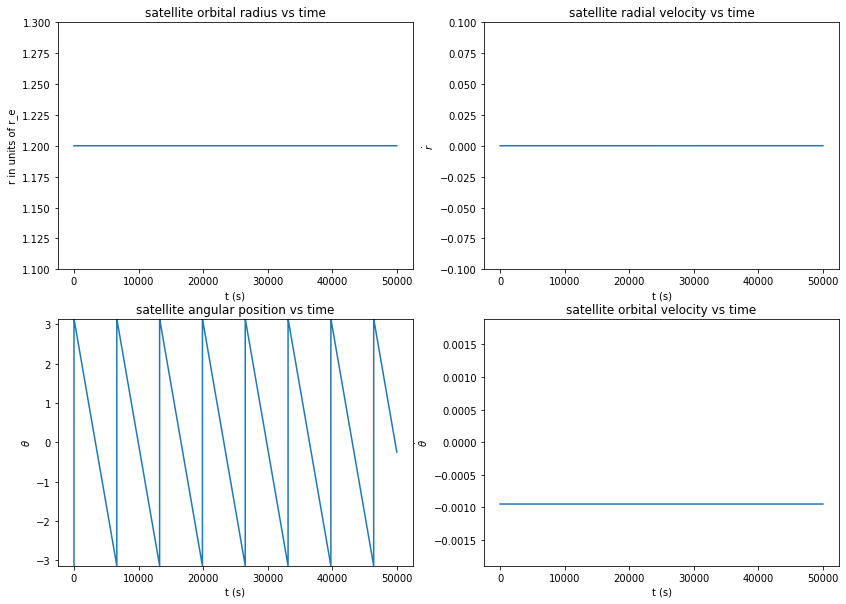

In [9]:
tvals = sol.t
r_vals = sol.y[0]
drdt_vals = sol.y[1]
theta_vals = sol.y[2]
dtheta_dt_vals = sol.y[3]

fig,ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].plot(tvals,r_vals/r_e)
ax[0,0].set_ylim(1.1,1.3)
ax[0,0].set_xlabel('t (s)')
ax[0,0].set_ylabel('r in units of r_e')
ax[0,0].set_title('satellite orbital radius vs time')

ax[0,1].plot(tvals,drdt_vals)
ax[0,1].set_ylim(-0.1,0.1)
ax[0,1].set_xlabel('t (s)')
ax[0,1].set_ylabel(r'$\dot{r}$')
ax[0,1].set_title('satellite radial velocity vs time')

vals_theta = np.mod(theta_vals,2*np.pi)-np.pi
ax[1,0].plot(tvals,vals_theta)
ax[1,0].set_ylim(-np.pi,np.pi)
ax[1,0].set_xlabel('t (s)')
ax[1,0].set_ylabel(r'$\theta$')
ax[1,0].set_title('satellite angular position vs time')

ax[1,1].plot(tvals,dtheta_dt_vals)
ax[1,1].set_ylim(2*dtheta_dt0,-2*dtheta_dt0)
ax[1,1].set_xlabel('t (s)')
ax[1,1].set_ylabel(r'$\dot{\theta}$')
t = ax[1,1].set_title('satellite orbital velocity vs time')

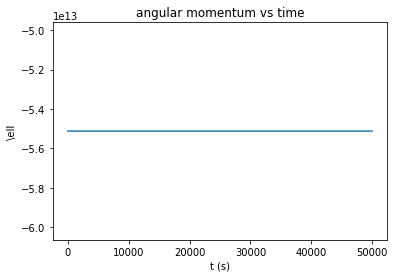

In [10]:
lt = angmom(r_vals,dtheta_dt_vals)
fig,ax = plt.subplots()
ax.plot(tvals,lt)
ax.set_ylim(1.1*l,0.9*l)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'\ell')
t = ax.set_title('angular momentum vs time')

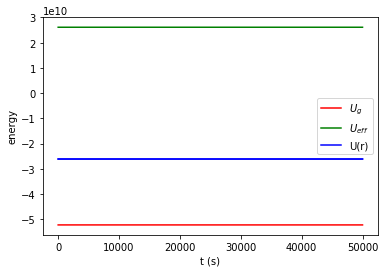

In [11]:
E = 0.5*mu*drdt_vals**2 + Ueff(r_vals) + U(r_vals)

fig,ax = plt.subplots()
ax.plot(tvals,E,'b')
ax.plot(tvals,U(r_vals),'r',label=r'$U_g$')
ax.plot(tvals,Ueff(r_vals),'g',label=r'$U_{eff}$')
ax.plot(tvals,U(r_vals)+Ueff(r_vals),'b',label='U(r)')
ax.set_xlabel('t (s)')
ax.set_ylabel('energy')
plt.legend(loc='center right')

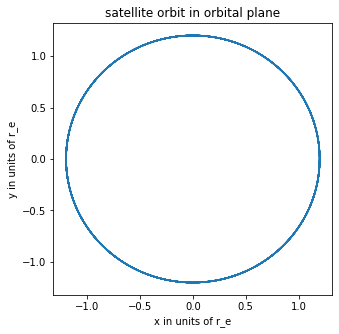

In [12]:
xvals = r_vals * np.cos(theta_vals)
yvals = r_vals * np.sin(theta_vals)

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(xvals/r_e,yvals/r_e)
ax.set_xlabel('x in units of r_e')
ax.set_ylabel('y in units of r_e')
t = ax.set_title('satellite orbit in orbital plane')